In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Desktop/Project/dataset.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/Project/dataset.csv'

India: R^2 = -58.9970, MSE = 5033457361.0177
Training Data - India:
Actual Values: [1107939.87, 1126890.377, 1145638.789, 1163638.637, 1181108.939, 1198274.68, 1215194.931, 1232085.388, 1249141.852, 1266100.53, 1282873.899, 1299390.228, 1315102.79, 1330630.219, 1346642.46, 1361748.899, 1376257.714, 1389966.387]
Predicted Values: [1111111.9323489028, 1126940.619675334, 1149106.6698754388, 1171712.4732475835, 1181540.2107279855, 1187781.9117236095, 1190109.2930635172, 1210676.315321024, 1228131.471243437, 1248921.4957913714, 1266758.1485857922, 1316914.446697231, 1319797.657261725, 1330204.760315116, 1354421.1002550083, 1350223.7690980989, 1379282.227088626, 1390002.7672954756]

Test Data - India:
Actual Values: [1389966.387, 1402807.867, 1412319.817]
Predicted Values: [1390002.7672954756, 1315185.9765279847, 1326164.28862464]

Madagascar: R^2 = 0.7377, MSE = 83354.5146
Training Data - Madagascar:
Actual Values: [17464.727, 17983.893, 18517.655, 19066.686, 19633.911, 20216.005, 20811.193

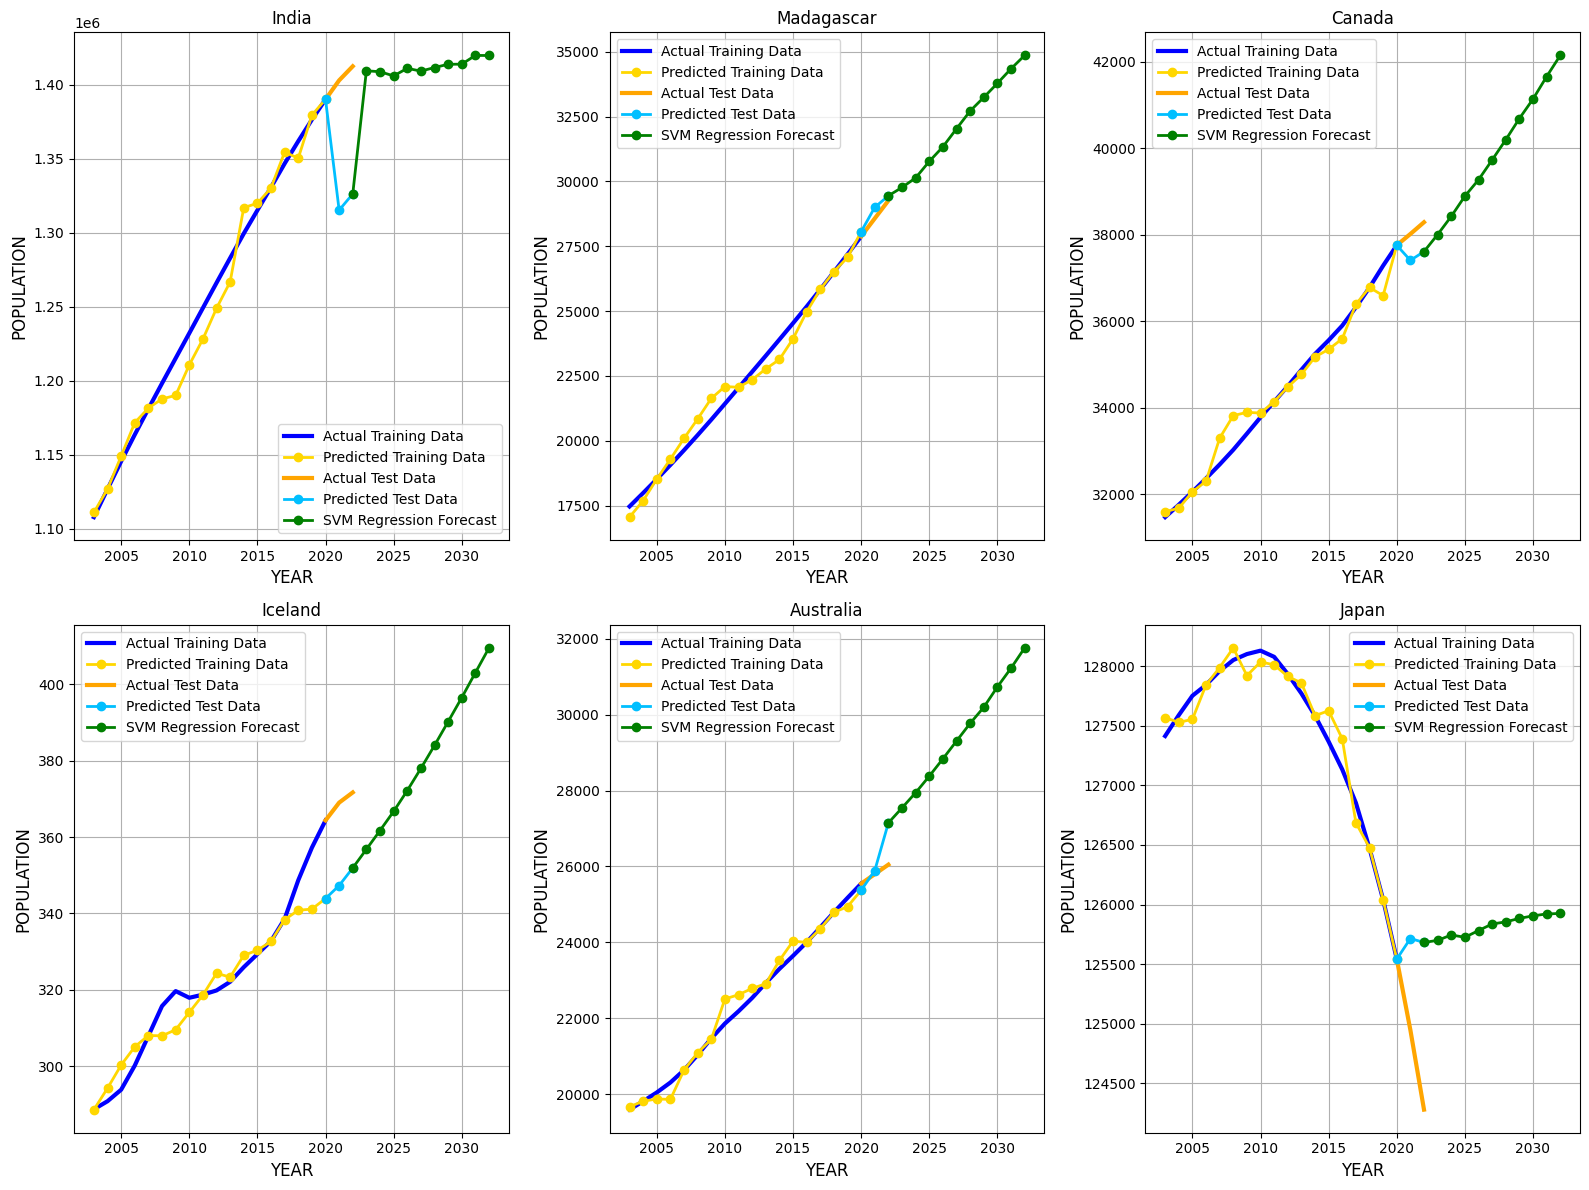

   Location  Time  Population_Prediction
0     India  2022           1.326164e+06
1     India  2023           1.409288e+06
2     India  2024           1.408639e+06
3     India  2025           1.405816e+06
4     India  2026           1.410932e+06
..      ...   ...                    ...
61    Japan  2028           1.258544e+05
62    Japan  2029           1.258841e+05
63    Japan  2030           1.259048e+05
64    Japan  2031           1.259215e+05
65    Japan  2032           1.259249e+05

[66 rows x 3 columns]


In [2]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

countries_to_keep = ['India', 'Madagascar', 'Canada', 'Iceland', 'Australia', 'Japan']
df = df[df['Location'].isin(countries_to_keep)]

df_train = df[(df['Time'] >= 2003) & (df['Time'] <= 2020)]
df_test = df[(df['Time'] >= 2020) & (df['Time'] <= 2022)]
df_predict = df[(df['Time'] >= 2022) & (df['Time'] <= 2032)]

population_column = 'TPopulation1Jan'
additional_features = ['Births', 'Deaths', 'NetMigrations', 'LEx', 'MedianAgePop']

predictions_df = pd.DataFrame(columns=['Location', 'Time', 'Population_Prediction'])

fig, ax = plt.subplots(2, 3, figsize=(16, 12))
ax = ax.flatten()

for i, country in enumerate(countries_to_keep):
    country_train_data = df_train[df_train['Location'] == country]
    country_test_data = df_test[df_test['Location'] == country]
    country_predict_data = df_predict[df_predict['Location'] == country]

    X_train = country_train_data[additional_features]
    y_train = country_train_data[population_column]

    X_test = country_test_data[additional_features]
    y_test = country_test_data[population_column]

    X_predict = country_predict_data[additional_features]
    
    model = SVR(kernel='linear', C=3.0)
    model.fit(X_train, y_train)
    
    forecast_values = model.predict(X_predict)
    
    r2 = r2_score(y_test, model.predict(X_test))
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    print(f"{country}: R^2 = {r2:.4f}, MSE = {mse:.4f}")
    
    train_predictions = model.predict(X_train)
    print(f"Training Data - {country}:\nActual Values: {list(y_train)}\nPredicted Values: {list(train_predictions)}\n")
    
    test_predictions = model.predict(X_test)
    print(f"Test Data - {country}:\nActual Values: {list(y_test)}\nPredicted Values: {list(test_predictions)}\n")

    forecast_values = model.predict(X_predict)

    country_predictions = pd.DataFrame({
        'Location': [country] * len(country_predict_data),
        'Time': country_predict_data['Time'],
        'Population_Prediction': forecast_values
    })

    predictions_df = pd.concat([predictions_df, country_predictions], ignore_index=True)
    
    ax[i].plot(country_train_data['Time'], y_train, label='Actual Training Data', linewidth=3, color='blue')
    ax[i].plot(country_train_data['Time'], model.predict(X_train), label='Predicted Training Data', linewidth=2, color='gold', marker='o')
    ax[i].plot(country_test_data['Time'], y_test, label='Actual Test Data', linewidth=3, color='orange')
    ax[i].plot(country_test_data['Time'], model.predict(X_test), label='Predicted Test Data', linewidth=2, color='deepskyblue', marker='o')
    ax[i].plot(country_predict_data['Time'], forecast_values, label='SVM Regression Forecast', linewidth=2, color='green', marker='o')
    ax[i].set_title(country)
    ax[i].set_xlabel('YEAR', fontsize=12)
    ax[i].set_ylabel('POPULATION', fontsize=12)
    ax[i].legend(fontsize=10)
    ax[i].grid()

plt.tight_layout()
plt.show()

print(predictions_df)